 TP  2 : Les villes de France
 =====

1 - Introduction 
------


L'objectif de ce TP est d'aller plus loin dans l'utilisation de numpy en réalisant un programme qui permette de calculer des distances entre villes. 

Le TP se décomposera en deux parties. Dans un premier temps, nous étudirons plusieurs approches pour calculer des distances avec les librairies `numpy` et `scipy` sur un exemple de synthèse. Puis dans un second temps, nous appliquerons ces principes pour calculer les distances entre les villes de Normandie.

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html

**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

In [1]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt

Afin de vous guider dans la détection d'erreur dans votre code. Nous avons introduit des blocs de tests. Il n'est pas nécessaire que vous compreniez en détail le code de ces blocs. Vous devez uniquement les exécuter et corriger les erreurs de votre code si un des tests n'est pas valide. Il est important de noter que le fait de valider le test ne garantie pas que votre code ne contient pas d'erreur. Par contre un test non validé implique nécessairement que votre code contient une erreur.

- Si tout les tests sont valides, vous aurez un message écrit en vert indiquant : Ok - Tous les tests sont validés.
- Si un des tests n'est pas valide, vous aurez un message écrit en rouge indiquant : Au moins un test n'est pas validé.
- Pour les tests n'ont valide, vous aurez des éléments d'information sur le test non valide. En particulier, un message écrit en jaune vous détaillera la nature du test échoué.

Voici un exemple d'utilisation. Le bloc suivant est censé contenir l'affectation de la valeur 42 à la variable `a`. Le bloc de test d'après vérifie que vous avez correctement effectué l'affectation. Exécutez les deux blocs avec des valeurs de `a` correcte et incorrecte.

In [2]:
a = 42

In [3]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(a,42,err_msg="\033[93m {}\033[00m" .format('Test 1 : a n\'est pas égale à 42. Vérifiez que a==42'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


2 - Le calcul de distance avec `numpy` et `scipy`.
----

### 2.1 - Création de données de synthèses

Dans cette première section, nous créerons un ensemble de points pour tester ensuite différentes stratégies de calcul de distances entre ces points.

Créez un vecteur `x` de 10 valeurs entre 0 et $2\pi$ ($2\pi$ compris). 

In [5]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(len(x),10,err_msg="\033[93m {}\033[00m" .format('Test 1 : x n\'a pas le bon nombre d\'élément. Vérifiez que len(x)==10'))
    np.testing.assert_equal(x[0],0,err_msg="\033[93m {}\033[00m" .format('Test 2 : la première valeur de x n\'est pas 0.'))
    np.testing.assert_equal(x[-1],2*np.pi,err_msg="\033[93m {}\033[00m" .format('Test 3 : la dernière valeur de x n\'est pas 2pi.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Concaténez les vecteurs $cos(x)$ et $sin(x)$ pour former un tableau `p` de taille (10,2).

In [7]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(p.shape,(10,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau p incorrecte. Vérifiez que p.shape==(10,2).'))
    np.testing.assert_almost_equal(p[3,0],-0.5,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première colonne ne contient pas cos(x).'))
    np.testing.assert_almost_equal(p[3,1],np.sin(np.pi/3),err_msg="\033[93m {}\033[00m" .format('Test 3 : La deuxième colonne ne contient pas sin(x).'))

except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez les 10 points que nous venons de créer avec la fonction `plt.scatter`. Vous pouvez ajouter `plt.axis('equal')` pour avoir des axes orthonormaux.

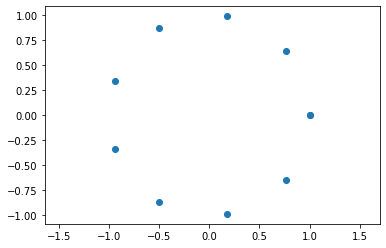

### 2.2 Calcul de distances euclidiennes entre points en utilisant seulement `numpy`.

Dans cette partie nous allons calculer la distance entre les 10 points se trouvant dans le tableau `p` en utilisant uniquement la librairie `numpy`. La solution que l'on va mettre en place n'est pas l'unique solution possible avec cette librairie (vous trouverez notament une autre solution dans le cours 2). A la fin de cette partie, nous aurons une matrice qui permet de retrouver la distance entre deux points en regardant la case associé aux 2 points. Par exemple la case de coordonnée (2,3) donne la distance entre le point `p[2]` et le point `p[3]`. 



Créez deux versions de la matrice `p` de dimensions respectivement (1,10,2) et (10,1,2) que vous nommerez `p1` et `p2`.

In [10]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(p1.shape,(1,10,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau p1 incorrecte. Vérifiez que p1.shape==(1,10,2).'))
    np.testing.assert_equal(p2.shape,(10,1,2),err_msg="\033[93m {}\033[00m" .format('Test 2 : Dimension du tableau p1 incorrecte. Vérifiez que p1.shape==(10,1,2).'))
    np.testing.assert_equal(p1[0,:,:],p2[:,0,:],err_msg="\033[93m {}\033[00m" .format('Test 3 : Les valeurs de p1 ou p2 sont incorrectes.'))
    np.testing.assert_equal(p1.reshape(-1),p.reshape(-1),err_msg="\033[93m {}\033[00m" .format('Test 4 : Les valeurs de p1 sont incorrectes.'))
    np.testing.assert_equal(p2.reshape(-1),p.reshape(-1),err_msg="\033[93m {}\033[00m" .format('Test 5 : Les valeurs de p2 sont incorrectes.'))
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant les deux tableaux `p1` et `p2` et le mécanisme de broadcasting, calculez la soustraction de toutes les valeurs de `p` entre elles. Le résultat se nommera `s` et sera de taille (10,10,2).

In [12]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(s.shape,(10,10,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau s incorrecte. Vérifiez que s.shape==(10,10,2).'))
    np.testing.assert_almost_equal(s[3,4,:],
                                   [np.cos(2*np.pi*4/9)-np.cos(2*np.pi*3/9),np.sin(2*np.pi*4/9)-np.sin(2*np.pi*3/9)],
                                   err_msg="\033[93m {}\033[00m" .format('Test 2 : Valeurs de s incorrectes (ex: la case de coordonnées  [3,4])')
                                  )

    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Faites la somme des carrés des valeurs de `s` selon le dernier axe. Le résultat se nommera `dist2`.

Dimensions de dist2: (10, 10)


In [14]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(dist2.shape,(10,10),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau dist2 incorrecte. Vérifiez que dist2.shape==(10,10).'))
    np.testing.assert_almost_equal(s[8,2,0]**2+s[8,2,1]**2,
                                   dist2[8,2],
                                   err_msg="\033[93m {}\033[00m" .format('Test 2 : Valeurs de dist2 incorrectes  (ex: la case de coordonnées [7,2])')
                                  )

    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Calculez la racine carré des valeurs de `dist2` que vous mettrez dans la variable `dist_numpy`. Les cases de ce tableaux correspondent aux distances euclidiennes entre chacun des points.

In [16]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(dist_numpy.shape,(10,10),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau dist_numpy incorrecte. Vérifiez que dist_numpy.shape==(10,10).'))
    np.testing.assert_almost_equal(dist_numpy**2,dist2,
                                   err_msg="\033[93m {}\033[00m" .format('Test 2 : Valeurs de dist_numpy incorrectes.')
                                  )

    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant `dist_numpy`, quelle est la distance entre le point 3 et le point 5 ? 

### 2.3 Calcul de distances euclidiennes en utilisant `scipy`.

La fonction `sc.spatial.distance.pdist` de la librairie *scipy* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) permet de calculer toutes les distances (par défaut la distance euclidienne) entre les points d'un ensemble de point. Elle retourne ainsi un vecteur qui correspond d'abord à la distance du premier point avec tous les autres, puis la distance du deuxième point avec tous les autres sauf le premier point (en effet la distance entre le deuxième point et le premier est déjà calculée lorsque l'on a calculé la distance entre le premier point et le deuxième)...
Cette fonction est optimisée pour calculer chaque distance une seule fois. 
Utilisez là pour calculer les distances des points `p` entre eux. Vous stockerez le résultat dans `md`.

In [18]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(len(md),45,err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau md incorrecte.'))
    np.testing.assert_almost_equal(md,[6.84040287e-01 ,1.28557522e+00 ,1.73205081e+00 ,1.96961551e+00,1.96961551e+00, 1.73205081e+00, 1.28557522e+00, 6.84040287e-01,2.44929360e-16, 6.84040287e-01, 1.28557522e+00, 1.73205081e+00,1.96961551e+00, 1.96961551e+00, 1.73205081e+00, 1.28557522e+00,6.84040287e-01, 6.84040287e-01, 1.28557522e+00, 1.73205081e+00,1.96961551e+00, 1.96961551e+00, 1.73205081e+00, 1.28557522e+00,6.84040287e-01, 1.28557522e+00, 1.73205081e+00, 1.96961551e+00,1.96961551e+00, 1.73205081e+00, 6.84040287e-01, 1.28557522e+00,1.73205081e+00, 1.96961551e+00, 1.96961551e+00, 6.84040287e-01,1.28557522e+00, 1.73205081e+00, 1.96961551e+00, 6.84040287e-01,1.28557522e+00, 1.73205081e+00, 6.84040287e-01, 1.28557522e+00,6.84040287e-01],
                                   err_msg="\033[93m {}\033[00m" .format('Test 2 : Valeurs de md incorrectes.')
                                  )

    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Nous allons maintenant réorganiser les valeurs pour avoir une matrice similaire à `dist_numpy` permettant de retrouver facilement la distance entre chaque point. Une case $i,j$ de cette matrice, représente la distance entre le`p[i]` et le point `p[j]`.

Créez un vecteur `v` des entiers compris ente 0 et 10 (10 exclus).

In [20]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(len(v),10,err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau v incorrecte.'))
    np.testing.assert_equal(v[0],0,err_msg="\033[93m {}\033[00m" .format('Test 2 : La première valeur de v n\'est pas 0.'))
    np.testing.assert_equal(v[-1],9,err_msg="\033[93m {}\033[00m" .format('Test 3 : La dernière valeur de v n\'est pas correct. La valeur doit être 9 car 10 est exclus.'))    
    np.testing.assert_equal(v[1:]-v[:-1],1,err_msg="\033[93m {}\033[00m" .format('Test 4 : L\'écart entre les valeurs n\'est pas correct.'))    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Créez une matrice `m` contenant le vecteur `v` répété sur 10 lignes.

In [21]:
m = ?
print('m=',m)

m= [[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [22]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(m.shape,(10,10),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau m incorrecte.'))
    np.testing.assert_equal(np.sum(m,0),np.linspace(0,90,10),err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de m ne sont pas correcte (au moins une colonne n est pas correcte).'))    
    np.testing.assert_equal(np.sum(m,1),45*np.ones(10),err_msg="\033[93m {}\033[00m" .format('Test 3 : Les valeurs de m ne sont pas correcte (au moins une ligne n est pas correcte).'))    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Créez un tableau `t` de dimension (10,10,2) contenant une concaténation de la matrice $m$ et de sa transposée. Il est plus simple de répondre à cette question avec la fonction `np.stack`.

In [24]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(t.shape,(10,10,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : Dimension du tableau t incorrecte.'))
    np.testing.assert_equal(t[:,:,0],m,err_msg="\033[93m {}\033[00m" .format('Test 2 : la première dimension de profondeur de t ne contient pas m.'))    
    np.testing.assert_equal(t[:,:,1],m.T,err_msg="\033[93m {}\033[00m" .format('Test 3 : la deuxième dimension de profondeur de t ne contient pas la transposé de m..'))    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Lancez le code suivant, vous devriez avoir une matrice triangulaire supérieur. La visualisation de la matrice sous forme d'image peut être plus clair qu'un affichage direct de ses valeurs.

Affichage direct des valeurs
 [[0 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


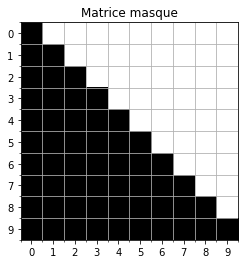

In [25]:
masque = 1*(t[:,:,0]>t[:,:,1])
print('Affichage direct des valeurs\n',masque)
plt.imshow(masque,cmap='gray')
plt.title('Matrice masque')
# Affichage de la grille
ax = plt.gca()
ax.set_xticks(np.arange(0, 10))
ax.set_yticks(np.arange(0, 10))
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.set_xticklabels(np.arange(10))
ax.set_yticklabels(np.arange(10))
plt.grid(which='minor')
plt.show()

Nous voulons créez une matrice permettant de connaitre les distances entre les 10 points étudiés. Une case $i,j$ représente la distance entre le point $i$ et le point $j$. Commencez par créer une matrice `dist` de (10,10) que vous initialiserez à 0.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


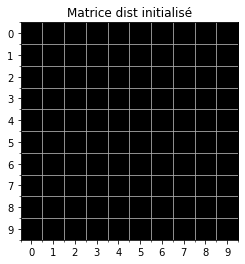

La matrice `masque` calculée précédemment indique entre quels points sont calculés les distances du vecteur `md` (calculé par la fonction `sc.spatial.distance.pdist`). Les 1 de la matrice `masque` sont les endroits où devront être recopié les valeurs du vecteur `md`.

Vérifiez qu'il y a autant d'éléments dans le vecteur `md` que de $1$ dans la matrice `masque`.

Longueur du vecteur md: 45
Nombre de 1 dans masque: 45


Recopiez les valeurs de `md` dans `dist` aux positions où le `masque==1`. Lors de la recopie, l'ordre de parcours correspond à l'ordre normal sur les tableaux numpy. 

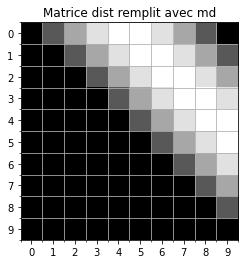

Il faut maintenant compléter la matrice `dist` avec son symétrique pour avoir la matrice de toutes les distances. La diagonale peut être laissé à 0 (la distance d'un point avec lui même est bien nulle).

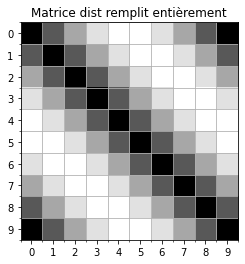

Vous pouvez vérifiez la distance entre le premier et le cinquième point.

Distance entre le point 0 et le point 4: 1.969615506024416 
Distance entre le point 4 et le point 0: 1.969615506024416


L'opération que nous venons de faire peut être faite directement avec la fonction `sc.spatial.distance.squareform` de scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform). Utilisez cette fonction sur `md` et comparez le résultat avec la matrice `dist` et la matrice `dist_numpy`.

Égalité des trois solutions ? : True


3 - Application du calcul des distances sur les villes de Normandie
---

### 3.1 Analyse du fichier fourni

Nous allons travailler sur une version modifiée d'un fichier recensant l'ensemble des villes de France dont la version originale se trouve à l'adresse suivante: https://www.data.gouv.fr/fr/datasets/listes-des-communes-geolocalisees-par-regions-departements-circonscriptions-nd/.
Vous avez à votre disposition deux fichiers appelé *villes\_france.csv* et *villes\_normandie.csv* contenant des informations sur respectivement l'ensemble des villes de France et de Normandie. Vous pouvez commencer à regarder leurs contenus au moyen d'un éditeur de texte (par exemple gedit), ou l'importer sous Open Office ou Libre Office. 

La commande shell (linux) suivante permet aussi de visualiser les premières lignes du fichier et donne un aperçu de sa structure.
- Les colonnes sont séparées par des ";". 
- La première ligne décrit les intitulés des différentes colonnes.
- Chaque ligne suivante recense une ville donnée.

Rq: le point d'exclamation permet d'exécuter des commandes shell dans un notebook jupyter.

In [32]:
!head -n 6 villes_normandie.csv

EU_circo;code_région;nom_région;chef-lieu_région;numéro_département;nom_département;préfecture;numéro_circonscription;nom_commune;codes_postaux;code_insee;latitude;longitude;éloignement
Nord-Ouest;25;Basse-Normandie;Caen;14;Calvados;Caen;1;Audrieu;14250;14026;49.2;-0.6;0.75
Nord-Ouest;25;Basse-Normandie;Caen;14;Calvados;Caen;1;Authie;14280;14030;49.2;-0.433333;1.07
Nord-Ouest;25;Basse-Normandie;Caen;14;Calvados;Caen;1;Bretteville-sur-Odon;14760;14101;49.166667;-0.416667;0.37
Nord-Ouest;25;Basse-Normandie;Caen;14;Calvados;Caen;1;Brouay;14250;14109;49.216667;-0.566667;1.52
Nord-Ouest;25;Basse-Normandie;Caen;14;Calvados;Caen;1;Caen;14000;14118;49.183333;-0.35;0.5


Vous travaillerez dans un premier sur le fichier *villes\_normandie.csv*. Une fois votre code fonctionnel, vous pouvez tester sur l'ensemble des villes de France *villes\_france.csv*.

Le code suivant importe le contenu du fichier *villes\_normandie.csv* dans la variable `nom_ville`. Seule la colonne 8 est importé, chaque colonne étant défini grâce au séparateur `;`.

In [33]:
nom_ville = np.loadtxt('villes_normandie.csv', delimiter=';',dtype=np.unicode,usecols=8,skiprows=1)
print(nom_ville)

[b'Audrieu' b'Authie' b'Bretteville-sur-Odon' ...
 b'Vieux-Rouen-sur-Bresle' b'Villers-sous-Foucarmont' b'Wanchy-Capval']


Le code suivant permet de détecter les villes portant le même nom. Nous les supprimerons dans la suite du TP. La variable `premier_doublon` indique l'indice de chaque première occurrence de nom des villes.

In [1]:
# Détection des doublons
nom_ville, premier_doublon = np.unique(nom_ville, return_index=True)
print(nom_ville)

En utilisant le tableau `nom_ville` et une boucle `for`, créez un dictionnaire python nommé `ville` donnant pour un nom de ville son numéro correspondant à son ordre d'apparition dans le tableau `nom_ville`. Par exemple *Ablon* aura le numéro 0, *Caen* le numéro 428...

In [37]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(type(ville),type({}),err_msg="\033[93m {}\033[00m" .format('Test 1 : ville n\'est pas un dictionnaire'))
    np.testing.assert_equal(nom_ville[ville['Audrieu']],'Audrieu',err_msg="\033[93m {}\033[00m" .format('Test 2 : La ville de Audrieu n\'a pas le bon indexe.'))
    np.testing.assert_equal(nom_ville[ville['Caen']],'Caen',err_msg="\033[93m {}\033[00m" .format('Test 3 : La ville de Caen n\'a pas le bon indexe.'))                                      
    np.testing.assert_equal(len(ville),2946,err_msg="\033[93m {}\033[00m" .format('Test 4 : Le nombre d\'éléments dans le dictonnaire ville n\'est pas correct.'))                                      
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Créez une matrice numpy `coord` dans laquelle chaque ligne représente une ville, la première colonne contient la latitude et la seconde colonne la longitude de la ville. Pour cela remplacez dans le code suivant les "?" avec les bonnes valeurs. Vous aurez besoin d'ouvrir le fichier *villes_normandie.csv* avec un éditeur de texte pour connaitre les indices des colonnes à récupérer.

In [38]:
coord = np.loadtxt('villes_normandie.csv', delimiter=';',usecols=(?,?),skiprows=1) 
coord = coord[premier_doublon]

In [39]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(coord[428],[49.183333,-0.35 ],err_msg="\033[93m {}\033[00m" .format('Test 1 : les coordonnées de Caen ne sont pas correct.'))
    np.testing.assert_equal(coord[ville['Caen']],[49.183333,-0.35 ],err_msg="\033[93m {}\033[00m" .format('Test 2 : la variable ville n\'est pas correcte.'))
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Sauver le dictionnaire et les matrices dans un fichier de type "pickle", cela sera plus facile à charger ultérieurement. 

In [40]:
import pickle

# pour écrire les données sur disque avec pickle
with open('data.pickle', 'wb') as f:  
    pickle.dump([ville,nom_ville,coord], f)
    
# pour lire les données sur disque avec pickle
with open('data.pickle', 'rb') as f:  
    [ville,nom_ville,coord] = pickle.load(f)

### 3.2 - Distances géodésiques entre villes

Dans un premier temps, vous écrirez une fonction `distGeo` qui permet de calculer la distance géodésique entre deux villes, à partir des coordonnées des villes. Vous utiliserez pour cela l'équation suivante :

$$
	d_g = R \cos^{-1}\left(\sin(p1_{lat})\sin(p2_{lat})+\cos(p1_{lat})\cos(p2_{lat})\cos(p1_{lon}-p2_{lon})\right)
$$
où $R=6367.445$ est le rayon de la terre (en km), $p1$ et $p2$ les deux points dont on souhaite calculer la distance. Les indices $_{lat}$ $_{lon}$ représentent la latitude et la longitude en radian. Attention, dans le ficher de données, les valeurs sont données en degrés.


In [1]:
R = 6367.445

def distGeo(u,v):
    u1 = ?
    v1 = ?
    return ?


In [42]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(distGeo(np.array([43,-88]),np.array([43,-88])),0,decimal=4,err_msg="\033[93m {}\033[00m" .format('Test 1 : il est possible que la formule de dg ne soit pas correctement écrite.'))
    np.testing.assert_almost_equal(distGeo(np.array([10,-30])+360,np.array([-50,-78])),distGeo(np.array([10,-30]),np.array([-50,-78])),err_msg="\033[93m {}\033[00m" .format('Test 2 : il manque la conversion de u en radian.'))
    np.testing.assert_almost_equal(distGeo(np.array([10,-30]),360+np.array([-50,-78])),distGeo(np.array([10,-30]),np.array([-50,-78])),err_msg="\033[93m {}\033[00m" .format('Test 3 : il manque la conversion de v en radian.'))
    np.testing.assert_almost_equal(distGeo(coord[ville["Caen"]],coord[ville["Audrieu"]]),18.25141017851904,err_msg="\033[93m {}\033[00m" .format('Test 4 : la distance géodésique entre Audrieu et Caen n\'est pas correcte. ville n\'est pas correcte.'))
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 


 Ok - Tous les tests sont validés.


Vérifiez que votre fonction donne un résultat correct en calculant la distance entre Caen et Rouen et comparez le  résultat à celui donné par le site https://www.ephemeride.com/atlas/distance/27/ qui permet de calculer les distances à vol d'oiseau entre deux villes.

Distance ente Caen et Rouen: 107.5056062486595


Nous désirons désormais calculer une matrice `dist` contenant l'ensemble des distances entre villes. La valeur $(i,j)$ de cette matrice représentera la distance entre la ville $i$ et la ville $j$.
 
Construire cette matrice avec des boucles prendrait beaucoup trop de temps. Utilisez les fonctions `pdist` et `squareform` vu en début de TP. Nous attirons votre attention sur l'argument `metric` de la fonction `pdist` permettant de choisir le type de distance utilisée. Cet argument peut être soit une chaîne de caractère parmi celles proposées dans la documentation, soit une fonction que vous avez préalablement créée  (comme ici la fonction `distGeo`).

**Calculez cette matrice de distance pour les 500 premières villes (matrice 500x500).** 
Affichez également le temps d'exécution de ce bloc d'instruction.

In [44]:
%%time
md = ?
dist = ?

CPU times: user 1.26 s, sys: 4.81 ms, total: 1.27 s
Wall time: 1.31 s


In [45]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(dist[ville['Caen'],ville['Audrieu']],18.25141017851904,err_msg="\033[93m {}\033[00m" .format('Test 1 : la distance entre Caen et Audrieu n\'est pas correcte.'))

except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Le calcul de l'ensemble des distances entre les villes est une opération de complexité quadratique. Cela veux dire que si le nombre de ville augmente d'un facteur $n$ alors le temps de calcul augmentera à peu près d'un facteur $n^2$. À votre avis que va-t-il se passer si on veut calculer cette matrice pour l'ensemble des villes de Normandie ? Pour l'ensemble des villes de France ? 

In [46]:
%%time
# à compléter

CPU times: user 42 s, sys: 33.5 ms, total: 42 s
Wall time: 42.1 s


### 3.3- Distances euclidiennes entre villes

Nous allons à présent mettre en place une méthode plus rapide pour calculer la distance entre les différentes villes. Nous allons commencer par représenter les villes par leurs coordonnées 3D, et c'est à partir de ces coordonnées 3D que l'on calculera les distances euclidiennes entre villes. La distance euclidienne est moins précise que la distance géodésique car elle ne prend pas en compte la courbure de la terre mais son calcul est plus rapide. 

Pour calculer les coordonnées 3D, vous pourrez utiliser les équations suivantes :

\begin{eqnarray*}
	x & = & R \ \cos(p_{lat}) \sin(p_{lon})\\
	y & = & R \ \cos(p_{lat}) \cos(p_{lon})\\
	z & = & R \ \sin(p_{lat})\\
\end{eqnarray*}

Attention, les angles doivent être en radian et non en degré et $R=6367.445$ est le rayon de la terre. 

Écrivez une fonction `convert3D` qui convertit un tableau de coordonnées décrites en terme de latitude et de longitude en un tableau de coordonnées 3D. 

In [47]:
def convert3D(u):
    xyz = np.zeros((u.shape[0],3))
    xyz[:,0] = ?
    xyz[:,1] = ?
    xyz[:,2] = ?
    return xyz


In [48]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(convert3D(np.array([[30,-47],[78,44]])).shape,
                                   (2,3),
                                   err_msg="\033[93m {}\033[00m" .format('Test 1 : Problème sur les dimensions de sortie. Il doit avoir autant de ligne que d\'exemple et 3 colonnes.)')
                                  )
    np.testing.assert_almost_equal(convert3D(np.array([[30,-47],[78,44]]))[:,0],
                                   [-4032.95427327 , 919.6347762 ],
                                   err_msg="\033[93m {}\033[00m" .format('Test 2 : La valeur de x est fausse.')
                                  )    
    np.testing.assert_almost_equal(convert3D(np.array([[30,-47],[78,44]]))[:,1],
                                   [3760.79070153,  952.30968837],
                                   err_msg="\033[93m {}\033[00m" .format('Test 3 : La valeur de y est fausse.')
                                  )  
    np.testing.assert_almost_equal(convert3D(np.array([[30,-47],[78,44]]))[:,2],
                                   [3183.7225 ,    6228.30104955],
                                   err_msg="\033[93m {}\033[00m" .format('Test 4 : La valeur de z est fausse.')
                                  )  
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 


 Ok - Tous les tests sont validés.


En utilisant la fonction `plt.scatter` de *matplotlib*, affichez chaque ville de Normandie sous la forme de point de coordonnées $(x,-y)$. On ignorera la 3ème coordonnée $z$ qui correspond à la distance avec le centre de la terre.   

Vous pouvez afficher d'une couleur différente les villes de *Caen* et *Rouen*.

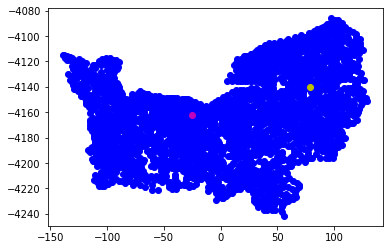

Créez une fonction `distEuc` qui calcul la distance euclidienne entre deux villes dont les coordonnées sont en latitude, longitude. Vous utiliserez une fonction de concaténation et la fonction `convert3D` pour faire cette fonction. 

In [50]:
def distEuc(u,v):
    # à compléter

Calculez la distance entre *Caen* et *Rouen* en utilisant `distEuc`. Trouvez-vous le même résultat qu'avec une distance géodésique ?

Distance ente Caen et Rouen: 107.50432936846148
